<a href="https://colab.research.google.com/github/SamanZargarzadeh/Automatic-Image-Tagging-for-Fashion-E-commerce/blob/main/Deep_Learning_Array_to_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Project

## Automatic Image Tagging for Fashion E-commerce  

Saman Zargarzadeh, Devy Yeap, Tiantian Gu, Tannaz Ebrahimi, Xia-Rong Zhang

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
import os
import gc
import sys
import json
import random
from pathlib import Path
import pandas as pd
import numpy as np

In [4]:
import pandas as pd
import numpy as np

In [5]:
# load the array 

train_set_x = np.load('/content/drive/MyDrive/train_set_x.npy')
test_set_x = np.load('/content/drive/MyDrive/test_set_x.npy')
cv_set_x = np.load('/content/drive/MyDrive/cv_set_x.npy')

train_set_y = np.load('/content/drive/MyDrive/train_set_y.npy')
test_set_y = np.load('/content/drive/MyDrive/test_set_y.npy')
cv_set_y = np.load('/content/drive/MyDrive/cv_set_y.npy')

# Tensorflow

In [6]:
train_set_x=train_set_x.T
test_set_x=test_set_x.T
cv_set_x=cv_set_x.T

In [7]:
import tensorflow as tf

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image
from keras.regularizers import l2
from keras.optimizers import Adam



### A Neural Network with two hidden layers.


In [69]:
n_1=19
alpha= 0.0025
learning_rate = alpha 
lambd=0.1
epochs=10

In [70]:
modelD = Sequential()
modelD.add(Dense(n_1, activation='relu', input_shape=(7938,), kernel_regularizer=l2(lambd)))
modelD.add(Dense(4, activation='relu', kernel_regularizer=l2(lambd)))
modelD.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(lambd)))

optimizer = Adam(learning_rate=learning_rate)

modelD.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
historyD = modelD.fit(train_set_x, train_set_y , epochs=epochs)
pd.DataFrame(historyD.history).head()

Epoch 1/10
150/150 [==============================] - 1s 3ms/step - loss: 1.5352 - accuracy: 0.4982
Epoch 2/10
150/150 [==============================] - 0s 3ms/step - loss: 0.8181 - accuracy: 0.5136
Epoch 3/10
150/150 [==============================] - 1s 4ms/step - loss: 0.7445 - accuracy: 0.4991
Epoch 4/10
150/150 [==============================] - 1s 4ms/step - loss: 0.7173 - accuracy: 0.4891
Epoch 5/10
150/150 [==============================] - 0s 3ms/step - loss: 0.7038 - accuracy: 0.4957
Epoch 6/10
150/150 [==============================] - 1s 4ms/step - loss: 0.6975 - accuracy: 0.4993
Epoch 7/10
150/150 [==============================] - 1s 3ms/step - loss: 0.6949 - accuracy: 0.5009
Epoch 8/10
150/150 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4859
Epoch 9/10
150/150 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4976
Epoch 10/10
150/150 [==============================] - 1s 5ms/step - loss: 0.6933 - accuracy: 0.5009

,loss,accuracy
0,1.535201,0.498229
1,0.818148,0.513649
2,0.744516,0.499062
3,0.717322,0.489060
4,0.703790,0.495728


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

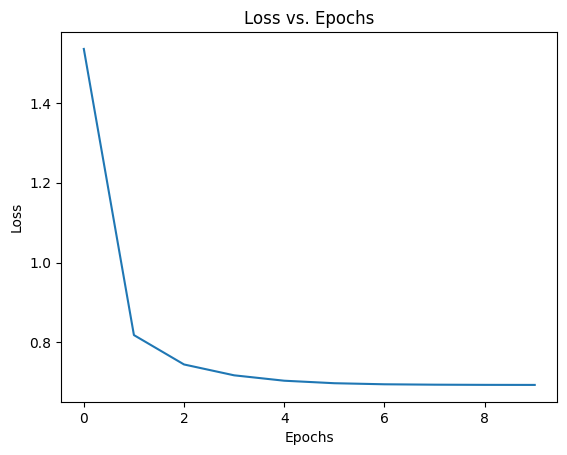

In [71]:
loss_plot = pd.DataFrame(historyD.history).plot(y="loss", title = "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

In [72]:
test_loss, test_accuracy = modelD.evaluate(test_set_x, test_set_y)

50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4975


In [73]:
cv_loss, cv_accuracy = modelD.evaluate(cv_set_x, cv_set_y)

50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4994


In [74]:
cv_accuracy

0.49937498569488525

In [42]:
comb=[]
for _ in range(100):
  n_1=np.random.randint(2,51)
  alpha=round(10 ** (np.random.uniform(-3,1)),4)
  comb.append((alpha,n_1))

comb

[(0.0011, 50),
 (0.1161, 16),
 (0.3244, 38),
 (1.6938, 16),
 (0.034, 47),
 (0.7146, 24),
 (0.1468, 35),
 (0.0228, 14),
 (0.0254, 42),
 (0.586, 6),
 (9.4971, 31),
 (0.0705, 18),
 (1.4341, 41),
 (0.0021, 34),
 (2.2423, 12),
 (0.0048, 40),
 (0.9295, 2),
 (1.0199, 23),
 (0.0175, 21),
 (0.0201, 33),
 (0.0365, 16),
 (0.0047, 18),
 (2.5083, 19),
 (0.2507, 20),
 (0.0077, 36),
 (0.9995, 19),
 (3.8251, 4),
 (3.4643, 36),
 (0.042, 28),
 (5.8079, 34),
 (0.5705, 45),
 (3.0883, 5),
 (0.0018, 35),
 (4.4677, 2),
 (0.0055, 34),
 (6.4052, 26),
 (0.0012, 45),
 (5.888, 15),
 (6.5536, 36),
 (0.0826, 34),
 (2.6213, 7),
 (0.0015, 45),
 (0.0085, 40),
 (0.0029, 17),
 (0.6529, 12),
 (0.1908, 23),
 (0.2299, 7),
 (1.2545, 34),
 (0.8493, 7),
 (5.2898, 23),
 (0.5901, 14),
 (0.3925, 25),
 (0.0012, 26),
 (5.4725, 4),
 (0.1222, 37),
 (0.0168, 12),
 (0.0296, 6),
 (1.1653, 32),
 (0.0047, 43),
 (0.0069, 20),
 (0.0889, 37),
 (0.0261, 23),
 (0.0013, 46),
 (0.0042, 17),
 (0.0023, 10),
 (0.017, 8),
 (0.0527, 12),
 (0.3386, 1

In [43]:
acc=[]
for i,c in enumerate(comb):

  learning_rate = c[0]
  n_1 = c[1]
  print("###############################################")
  print("combination No. ",i+1)
  print(learning_rate) 
  print(n_1)

  modelD = Sequential()
  modelD.add(Dense(n_1, activation='relu', input_shape=(7938,)))
  modelD.add(Dense(4, activation='relu'))
  modelD.add(Dense(1, activation='sigmoid'))

  optimizer = Adam(learning_rate=learning_rate)

  modelD.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  historyD = modelD.fit(train_set_x, train_set_y , epochs=10)
  print("*** ACCURACY FOR CV ***") 
  cv_loss, cv_accuracy=modelD.evaluate(cv_set_x, cv_set_y)
  acc.append(round(cv_accuracy*100,2))

###############################################
combination No.  1
0.0011
50
Epoch 1/10
150/150 [==============================] - 1s 5ms/step - loss: 0.6938 - accuracy: 0.5007
Epoch 2/10
150/150 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5009
Epoch 3/10
150/150 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.4947
Epoch 4/10
150/150 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.4972
Epoch 5/10
150/150 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5009
Epoch 6/10
150/150 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.4934
Epoch 7/10
150/150 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.4964
Epoch 8/10
150/150 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.4901
Epoch 9/10
150/150 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.5009
Epoch 10/10
150/150 [==

In [44]:
acc

[49.94,
 50.06,
 49.94,
 50.06,
 49.94,
 49.94,
 50.06,
 50.06,
 49.94,
 49.94,
 50.06,
 49.94,
 49.94,
 50.06,
 50.06,
 50.06,
 50.06,
 49.94,
 49.94,
 49.94,
 50.06,
 49.94,
 50.06,
 49.94,
 49.94,
 49.94,
 50.06,
 49.94,
 49.94,
 50.06,
 50.06,
 50.06,
 49.94,
 49.94,
 49.94,
 50.06,
 49.94,
 49.94,
 50.06,
 50.06,
 50.06,
 54.75,
 50.06,
 50.06,
 50.06,
 50.06,
 50.06,
 49.94,
 49.94,
 50.06,
 49.94,
 49.94,
 49.94,
 50.06,
 49.94,
 49.94,
 50.06,
 49.94,
 49.94,
 50.06,
 50.06,
 50.06,
 50.06,
 49.94,
 49.94,
 50.06,
 50.06,
 50.06,
 50.06,
 49.94,
 49.94,
 49.94,
 49.88,
 50.06,
 49.94,
 50.06,
 50.06,
 49.94,
 50.06,
 50.06,
 50.06,
 49.94,
 49.94,
 49.94,
 50.06,
 50.06,
 49.94,
 49.94,
 49.94,
 49.94,
 50.06,
 50.06,
 50.06,
 50.06,
 50.06,
 49.94,
 49.94,
 62.81,
 50.06,
 50.06]